Se quiere caracterizar (Media,Varianza, Asimetria y Kurtosis) la distribucion agregada de perdidas como resultado de las perdidas asociadas a los creditos que posee un FINTECH . Las variables que definen la Loss Distribution Aproach (LDA) Se obtiene del producto de las siguientes variables:

Monto (EAD): Es el monto de dinero que una persona solicita a la FINTECH
Probabilidad default (PD): Es la probablidad de que una persona incumpla el credito a lo largo de su vigencia
Loss Guarantee Default (LGD): La garantia que el solicitante puede colocar sobre el credito

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Gráfico de distribuciones


# Path to your file
file_path = '/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'

**Cargamos la base de datos de: Solicitantes Credito Año 4**

In [26]:
nxl='/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB=pd.read_excel(nxl,sheet_name=2)

XDB.head()

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.168536
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.173085
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.082779
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.463798
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.160611


In [27]:
#Se calcula la distribucion LDA
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
display(LDA)

,0
0,30.452702
1,38.595235
2,52.482156
3,91.404252
4,81.890611
...,...
1495,24.255075
1496,17.120129
1497,64.668290
1498,85.242859


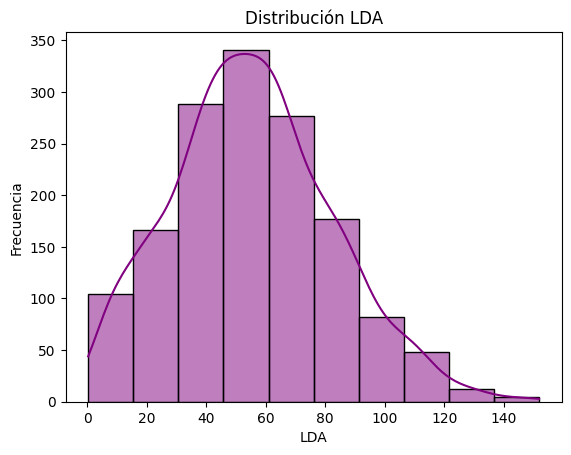

,LI,LS,ND,perdida
0,0.354255,15.502616,104.0,7.928435
1,15.502616,30.650978,166.0,23.076797
2,30.650978,45.799339,288.0,38.225159
3,45.799339,60.947701,341.0,53.373520
4,60.947701,76.096063,277.0,68.521882
5,76.096063,91.244424,177.0,83.670243
6,91.244424,106.392786,82.0,98.818605
7,106.392786,121.541148,48.0,113.966967
8,121.541148,136.689509,12.0,129.115328
9,136.689509,151.837871,5.0,144.263690


In [28]:
#Gráficar la distribución LDA
NC=10

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='purple')
plt.title('Distribución LDA')
plt.xlabel('LDA')
plt.ylabel('Frecuencia')
plt.show()

#Obtenemos la informacion de la Distribucion
counts, bin_edges = np.histogram(LDA, bins=NC)
LI =bin_edges[:-1];LS= bin_edges[1:]
mc=(LI+LS)/2 #Valor representativo de cada intervalo

#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

In [29]:
u=np.sum(mc*counts)/np.sum(counts)#valor esperado
print('La media de los datos es:',u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print('La varianza de los datos es:',varianza) # Mas intervalos, mas preciso

desviacion=np.sqrt(varianza)
print('La desviacion de los datos es:',desviacion)

#Quiero identificar datos raros o outliers
LIe=u-2*desviacion;LSe=u+2*desviacion
filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]
print('Los coeficiente de outliers son:',filas_out)

from scipy.stats import skew, kurtosis
print('El coeficiente de asimetria es:',skew(LDA))
print('El coeficiente de curtosis es:',kurtosis(LDA))

#Coeficiente de asimetria
cas=np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
print('El coeficiente de asimetria es:',cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print('La variacion del coeficiente de asimentria es:',vcas*100)
#Coeficiente de Curtosis
cur=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3
print('El coeficiente de curtosis es:',cur)

La media de los datos es: 55.66597231387269
La varianza de los datos es: 738.0837467102078
La desviacion de los datos es: 27.167696750188593
Los coeficiente de outliers son: [  25   32   52   71  114  155  259  294  335  342  361  373  386  388
  394  407  435  529  532  537  540  639  660  700  733  735  747  775
  813  829  853  912  916  926  945  948  970  985  998 1016 1048 1049
 1084 1094 1175 1221 1292 1298 1327 1413]
El coeficiente de asimetria es: 0.3354409078926966
El coeficiente de curtosis es: -0.06285449119370945
El coeficiente de asimetria es: 0.33970946303261645
La variacion del coeficiente de asimentria es: -1.2725207449311218
El coeficiente de curtosis es: -0.1037825028068542


In [30]:
PE=len(np.where(LDA<u)[0])
print('Las perdidas esperadas son:',PE)
OpVar=np.percentile(LDA,99.9)
print('El costo de aseguramiento de cada credito es:',OpVar)
PC=len(np.where(LDA>OpVar)[0])
print('Las perdidas catastroficas son:',PC)
PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])
print('Las perdidas no esperadas son:',PNE)

Las perdidas esperadas son: 781
El costo de aseguramiento de cada credito es: 147.29776773898615
Las perdidas catastroficas son: 2
Las perdidas no esperadas son: 717


#**AÑO 3**

In [31]:
nxl='/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB2=pd.read_excel(nxl,sheet_name=3)

XDB2.head()

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,2112,33,Hombre,Casado,0,1,1,4,Técnico,Indefinido,...,18,52.546662,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.064700,498.646271,0.005317
1,2115,42,Hombre,Soltero,1,1,1,5,Bachiller,Ninguno,...,18,2.808395,Sin Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.297233,371.733276,0.295880
2,2116,34,Hombre,Soltero,0,2,2,2,Bachiller,Indefinido,...,36,10.409358,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.122595,418.416077,0.004645
3,2117,47,Hombre,Casado,1,0,0,3,Profesional,Indefinido,...,24,80.445793,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,1,0.034746,593.847656,0.385068
4,2118,67,Mujer,Casado,1,0,0,3,Bachiller,Indefinido,...,36,27.508639,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081015,567.578308,0.054015


In [32]:
nxl='/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB2=pd.read_excel(nxl,sheet_name=3)

#Se calcula la distribucion LDA
LDA=XDB2.iloc[:,25]*XDB2.iloc[:,33]*(1+XDB2.iloc[:,35])
display(LDA)

,0
0,53.566719
1,16.953516
2,35.462688
3,77.548756
4,64.974313
...,...
1496,24.010720
1497,48.948467
1498,18.773132
1499,97.794371


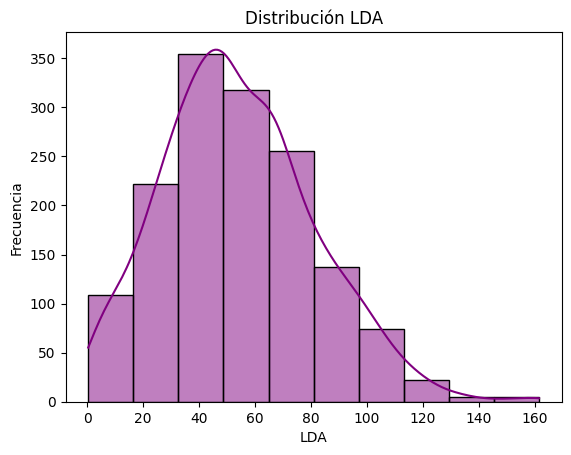

,LI,LS,ND,perdida
0,0.427835,16.545128,109.0,8.486481
1,16.545128,32.662422,222.0,24.603775
2,32.662422,48.779716,354.0,40.721069
3,48.779716,64.897009,318.0,56.838362
4,64.897009,81.014303,255.0,72.955656
5,81.014303,97.131597,137.0,89.072950
6,97.131597,113.248890,74.0,105.190244
7,113.248890,129.366184,22.0,121.307537
8,129.366184,145.483478,5.0,137.424831
9,145.483478,161.600771,5.0,153.542125


In [33]:
#Gráficar la distribución LDA
NC=10

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='purple')
plt.title('Distribución LDA')
plt.xlabel('LDA')
plt.ylabel('Frecuencia')
plt.show()

#Obtenemos la informacion de la Distribucion
counts, bin_edges = np.histogram(LDA, bins=NC)
LI =bin_edges[:-1];LS= bin_edges[1:]
mc=(LI+LS)/2 #Valor representativo de cada intervalo

#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

In [34]:
u=np.sum(mc*counts)/np.sum(counts)#valor esperado
print('La media de los datos es:',u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print('La varianza de los datos es:',varianza) # Mas intervalos, mas preciso

desviacion=np.sqrt(varianza)
print('La desviacion de los datos es:',desviacion)

#Quiero identificar datos raros o outliers
LIe=u-2*desviacion;LSe=u+2*desviacion
filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]
print('Los coeficiente de outliers son:',filas_out)

from scipy.stats import skew, kurtosis
print('El coeficiente de asimetria es:',skew(LDA))
print('El coeficiente de curtosis es:',kurtosis(LDA))

#Coeficiente de asimetria
cas=np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
print('El coeficiente de asimetria es:',cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print('La variacion del coeficiente de asimentria es:',vcas*100)
#Coeficiente de Curtosis
cur=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3
print('El coeficiente de curtosis es:',cur)

La media de los datos es: 54.35795284724899
La varianza de los datos es: 746.4973760157775
La desviacion de los datos es: 27.32210416523181
Los coeficiente de outliers son: [  18   52   58   63  100  104  122  170  207  237  322  352  369  378
  460  496  503  504  593  599  625  671  731  761  765  782  825  836
  874  885  906  964 1018 1024 1029 1039 1083 1117 1151 1161 1192 1193
 1203 1276 1390 1433]
El coeficiente de asimetria es: 0.46219026649218486
El coeficiente de curtosis es: 0.18859622645960705
El coeficiente de asimetria es: 0.46305726633508854
La variacion del coeficiente de asimentria es: -0.18758505008852902
El coeficiente de curtosis es: 0.05620072169277224


In [35]:
PE=len(np.where(LDA<u)[0])
print('Las perdidas esperadas son:',PE)
OpVar=np.percentile(LDA,99.9)
print('El costo de aseguramiento de cada credito es:',OpVar)
PC=len(np.where(LDA>OpVar)[0])
print('Las perdidas catastroficas son:',PC)
PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])
print('Las perdidas no esperadas son:',PNE)

Las perdidas esperadas son: 809
El costo de aseguramiento de cada credito es: 160.70668633158058
Las perdidas catastroficas son: 2
Las perdidas no esperadas son: 690


#**AÑO 2**

In [36]:
nxl='/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB3=pd.read_excel(nxl,sheet_name=4)

XDB3.head()

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,4285,52,Hombre,Casado,0,0,0,3,Tecnólogo,Indefinido,...,24,5.966434,Buenas Referencias,Hipoteca,Prop.sin Hipoteca,Mora mayor a 60 Dìas,0,0.253213,358.859253,0.109183
1,4286,31,Hombre,Casado,3,1,1,2,Bachiller,Ninguno,...,3,82.453584,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.212950,296.161011,0.004476
2,4288,29,NR,Soltero,0,0,0,3,Tecnólogo,Fijo,...,24,22.023156,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Màximo 3 moras 30 Dìas,1,0.105714,406.482330,0.120763
3,4292,38,Mujer,Casado,0,0,0,2,Técnico,Ninguno,...,36,3.179137,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.292361,312.640320,0.162121
4,4294,32,NR,Soltero,1,0,0,3,Bachiller,Fijo,...,36,17.509553,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.082367,472.922882,0.210041


In [37]:
nxl='/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB3=pd.read_excel(nxl,sheet_name=4)

#Se calcula la distribucion LDA
LDA=XDB3.iloc[:,25]*XDB3.iloc[:,33]*(1+XDB3.iloc[:,35])
display(LDA)

,0
0,33.565593
1,51.362740
2,52.265663
3,29.877416
4,48.271477
...,...
1495,35.876078
1496,76.230443
1497,74.910707
1498,54.383147


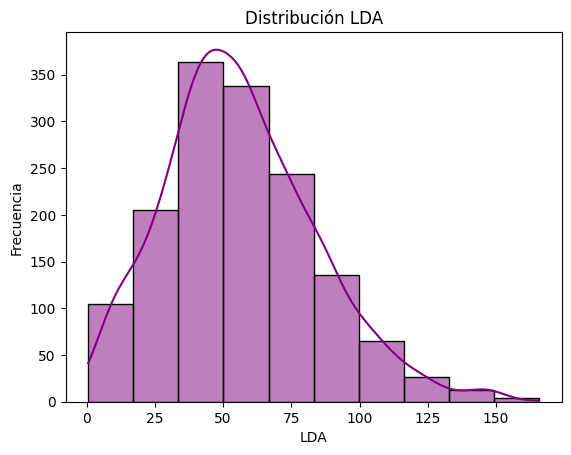

,LI,LS,ND,perdida
0,0.568346,17.091246,105.0,8.829796
1,17.091246,33.614145,205.0,25.352695
2,33.614145,50.137045,364.0,41.875595
3,50.137045,66.659945,338.0,58.398495
4,66.659945,83.182844,244.0,74.921395
5,83.182844,99.705744,136.0,91.444294
6,99.705744,116.228644,65.0,107.967194
7,116.228644,132.751544,26.0,124.490094
8,132.751544,149.274443,13.0,141.012993
9,149.274443,165.797343,4.0,157.535893


In [38]:
#Gráficar la distribución LDA
NC=10

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='purple')
plt.title('Distribución LDA')
plt.xlabel('LDA')
plt.ylabel('Frecuencia')
plt.show()

#Obtenemos la informacion de la Distribucion
counts, bin_edges = np.histogram(LDA, bins=NC)
LI =bin_edges[:-1];LS= bin_edges[1:]
mc=(LI+LS)/2 #Valor representativo de cada intervalo

#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

In [39]:
u=np.sum(mc*counts)/np.sum(counts)#valor esperado
print('La media de los datos es:',u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print('La varianza de los datos es:',varianza) # Mas intervalos, mas preciso

desviacion=np.sqrt(varianza)
print('La desviacion de los datos es:',desviacion)

#Quiero identificar datos raros o outliers
LIe=u-2*desviacion;LSe=u+2*desviacion
filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]
print('Los coeficiente de outliers son:',filas_out)

from scipy.stats import skew, kurtosis
print('El coeficiente de asimetria es:',skew(LDA))
print('El coeficiente de curtosis es:',kurtosis(LDA))

#Coeficiente de asimetria
cas=np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
print('El coeficiente de asimetria es:',cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print('La variacion del coeficiente de asimentria es:',vcas*100)
#Coeficiente de Curtosis
cur=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3
print('El coeficiente de curtosis es:',cur)

La media de los datos es: 56.36067049807551
La varianza de los datos es: 794.299449263555
La desviacion de los datos es: 28.18331863467386
Los coeficiente de outliers son: [  35  102  122  143  201  254  286  287  398  404  408  446  479  501
  532  559  578  595  648  665  713  726  765  769  793  795  817  822
  829  963  965  992 1007 1046 1105 1160 1215 1231 1232 1243 1283 1290
 1342 1343 1387 1395 1398 1409 1436]
El coeficiente de asimetria es: 0.5654219317544418
El coeficiente de curtosis es: 0.3749822454394929
El coeficiente de asimetria es: 0.5398359603970553
La variacion del coeficiente de asimentria es: 4.525111234719186
El coeficiente de curtosis es: 0.2591591450063109


In [40]:
PE=len(np.where(LDA<u)[0])
print('Las perdidas esperadas son:',PE)
OpVar=np.percentile(LDA,99.9)
print('El costo de aseguramiento de cada credito es:',OpVar)
PC=len(np.where(LDA>OpVar)[0])
print('Las perdidas catastroficas son:',PC)
PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])
print('Las perdidas no esperadas son:',PNE)

Las perdidas esperadas son: 813
El costo de aseguramiento de cada credito es: 149.7093186014969
Las perdidas catastroficas son: 2
Las perdidas no esperadas son: 685


#**Año 1**

In [41]:
nxl='/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB4=pd.read_excel(nxl,sheet_name=5)

XDB4.head()

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,18,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,60,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,48,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,36,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,3,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469


In [42]:
nxl='/content/sample_data/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB4=pd.read_excel(nxl,sheet_name=5)

#Se calcula la distribucion LDA
LDA=XDB4.iloc[:,25]*XDB4.iloc[:,33]*(1+XDB4.iloc[:,35])
display(LDA)

,0
0,49.091727
1,46.807427
2,31.491289
3,111.478589
4,69.142679
...,...
1337,47.135679
1338,40.412661
1339,61.750988
1340,60.599575


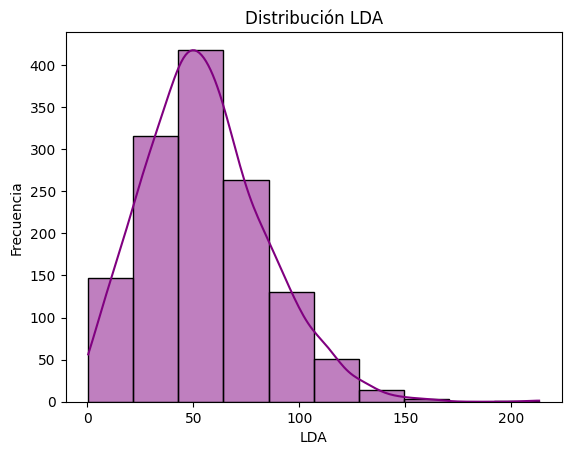

,LI,LS,ND,perdida
0,0.413092,21.695260,147.0,11.054176
1,21.695260,42.977428,315.0,32.336344
2,42.977428,64.259597,418.0,53.618513
3,64.259597,85.541765,263.0,74.900681
4,85.541765,106.823933,130.0,96.182849
5,106.823933,128.106101,51.0,117.465017
6,128.106101,149.388270,14.0,138.747186
7,149.388270,170.670438,3.0,160.029354
8,170.670438,191.952606,0.0,181.311522
9,191.952606,213.234775,1.0,202.593690


In [43]:
#Gráficar la distribución LDA
NC=10

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='purple')
plt.title('Distribución LDA')
plt.xlabel('LDA')
plt.ylabel('Frecuencia')
plt.show()

#Obtenemos la informacion de la Distribucion
counts, bin_edges = np.histogram(LDA, bins=NC)
LI =bin_edges[:-1];LS= bin_edges[1:]
mc=(LI+LS)/2 #Valor representativo de cada intervalo

#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

In [44]:
u=np.sum(mc*counts)/np.sum(counts)#valor esperado
print('La media de los datos es:',u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print('La varianza de los datos es:',varianza) # Mas intervalos, mas preciso

desviacion=np.sqrt(varianza)
print('La desviacion de los datos es:',desviacion)

#Quiero identificar datos raros o outliers
LIe=u-2*desviacion;LSe=u+2*desviacion
filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]
print('Los coeficiente de outliers son:',filas_out)

from scipy.stats import skew, kurtosis
print('El coeficiente de asimetria es:',skew(LDA))
print('El coeficiente de curtosis es:',kurtosis(LDA))

#Coeficiente de asimetria
cas=np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
print('El coeficiente de asimetria es:',cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print('La variacion del coeficiente de asimentria es:',vcas*100)
#Coeficiente de Curtosis
cur=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3
print('El coeficiente de curtosis es:',cur)

La media de los datos es: 55.91800167999396
La varianza de los datos es: 836.1104127631511
La desviacion de los datos es: 28.91557387919443
Los coeficiente de outliers son: [  16   26   46   81   85  138  190  231  246  292  296  363  371  410
  411  467  475  495  528  571  576  597  602  613  718  796  801  828
  831  837  839  853  854  864  917 1034 1063 1099 1108 1134 1191 1228
 1330]
El coeficiente de asimetria es: 0.6074481010737891
El coeficiente de curtosis es: 0.6938886954460353
El coeficiente de asimetria es: 0.5936899030624093
La variacion del coeficiente de asimentria es: 2.2649174451380043
El coeficiente de curtosis es: 0.49072605058951346


In [45]:
PE=len(np.where(LDA<u)[0])
print('Las perdidas esperadas son:',PE)
OpVar=np.percentile(LDA,99.9)
print('El costo de aseguramiento de cada credito es:',OpVar)
PC=len(np.where(LDA>OpVar)[0])
print('Las perdidas catastroficas son:',PC)
PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])
print('Las perdidas no esperadas son:',PNE)

Las perdidas esperadas son: 729
El costo de aseguramiento de cada credito es: 161.29129989014118
Las perdidas catastroficas son: 2
Las perdidas no esperadas son: 611


In [46]:
import pandas as pd

# Crear un diccionario con los resultados de cada año
data = {
    'Año 1': {
        'Media': 55.92,
        'Varianza': 836.11,
        'Asimetría': 0.61,
        'Curtosis': 0.69,
        'Pérdidas Esperadas (PE)': 729,
        'Costo de Aseguramiento (OpVar 99.9%)': 161.29,
        'Pérdidas Catastróficas (PC)': 2,
        'Pérdidas No Esperadas (PNE)': 611
    },
    'Año 2': {
        'Media': 56.36,
        'Varianza': 794.30,
        'Asimetría': 0.57,
        'Curtosis': 0.37,
        'Pérdidas Esperadas (PE)': 813,
        'Costo de Aseguramiento (OpVar 99.9%)': 149.71,
        'Pérdidas Catastróficas (PC)': 2,
        'Pérdidas No Esperadas (PNE)': 685
    },
    'Año 3': {
        'Media': 54.36,
        'Varianza': 746.50,
        'Asimetría': 0.46,
        'Curtosis': 0.19,
        'Pérdidas Esperadas (PE)': 809,
        'Costo de Aseguramiento (OpVar 99.9%)': 160.71,
        'Pérdidas Catastróficas (PC)': 2,
        'Pérdidas No Esperadas (PNE)': 690
    },
    'Año 4': {
        'Media': 55.66,
        'Varianza': 738.08,
        'Asimetría': 0.33,
        'Curtosis': -0.06,
        'Pérdidas Esperadas (PE)': 781,
        'Costo de Aseguramiento (OpVar 99.9%)': 147.30,
        'Pérdidas Catastróficas (PC)': 2,
        'Pérdidas No Esperadas (PNE)': 717
    }
}

# Convertir el diccionario a un DataFrame de pandas
summary_df = pd.DataFrame(data)

# Reordenar las columnas para que estén en el orden deseado (Año 1, Año 2, Año 3, Año 4)
summary_df = summary_df[['Año 1', 'Año 2', 'Año 3', 'Año 4']]


# Mostrar la tabla de resumen
display(summary_df)

,Año 1,Año 2,Año 3,Año 4
Media,55.92,56.36,54.36,55.66
Varianza,836.11,794.30,746.50,738.08
Asimetría,0.61,0.57,0.46,0.33
Curtosis,0.69,0.37,0.19,-0.06
Pérdidas Esperadas (PE),729.00,813.00,809.00,781.00
Costo de Aseguramiento (OpVar 99.9%),161.29,149.71,160.71,147.30
Pérdidas Catastróficas (PC),2.00,2.00,2.00,2.00
Pérdidas No Esperadas (PNE),611.00,685.00,690.00,717.00


#Análisis de Resultados de la Distribución de Pérdidas (LDA) por Año

1. Medidas de Tendencia Central y Dispersión:

* Media (Promedio de Pérdidas): La media de las pérdidas se ha mantenido relativamente estable a lo largo de los cuatro años, con valores que oscilan entre 54.36 y 56.36. Esto sugiere que, en promedio, el monto de las pérdidas no ha experimentado cambios drásticos.
* Varianza (Dispersión de las Pérdidas): Se observa una disminución constante en la varianza a lo largo de los años, pasando de 836.11 en el "Año 1" a 738.08 en el "Año 4". Esto indica que la dispersión de las pérdidas ha ido en descenso, lo que significa que los montos de las pérdidas son cada vez más predecibles y menos variables.
2. Forma de la Distribución:

* Asimetría: La asimetría ha disminuido de manera constante, pasando de 0.61 en el "Año 1" a 0.33 en el "Año 4". Todos los valores son positivos, lo que indica que la distribución está sesgada hacia la derecha. Una disminución en la asimetría positiva sugiere que la cola derecha de la distribución se está volviendo menos pesada, lo que implica una menor probabilidad de que ocurran pérdidas de mayor magnitud.
* Curtosis: La curtosis también ha disminuido a lo largo de los años, pasando de un valor de 0.69 en el "Año 1" a un valor negativo de -0.06 en el "Año 4". Esto indica que la distribución se ha vuelto menos "puntiaguda" y con colas menos pesadas en comparación con una distribución normal. Una menor curtosis, al igual que una menor asimetría, sugiere un menor riesgo de eventos extremos (pérdidas muy altas).
3. Análisis de las Pérdidas:

* Pérdidas Esperadas (PE): El número de pérdidas esperadas (aquellas que se encuentran por debajo de la media) ha fluctuado a lo largo de los años, sin una tendencia clara.
* Pérdidas No Esperadas (PNE): Se observa una tendencia al alza en el número de pérdidas no esperadas (aquellas que se encuentran entre la media y el percentil 99.9), pasando de 611 en el "Año 1" a 717 en el "Año 4".
* Pérdidas Catastróficas (PC): El número de pérdidas catastróficas (aquellas que superan el percentil 99.9) se ha mantenido constante en 2 para todos los años.
* Costo de Aseguramiento (OpVar 99.9%): El costo de aseguramiento, que representa el valor en riesgo en el percentil 99.9, ha mostrado cierta variabilidad, con los valores más altos en los años 1 y 3.

# Conclusión

La evolución de la distribución agregada de pérdidas a lo largo de los cuatro años muestra una tendencia positiva hacia una mayor estabilidad y una reducción del riesgo. Aunque la media de las pérdidas se ha mantenido relativamente constante, la disminución sostenida de la varianza, la asimetría y la curtosis indica que la cartera de créditos se ha vuelto más predecible y menos propensa a eventos extremos.

La reducción de la asimetría y la curtosis sugiere que la probabilidad de incurrir en pérdidas de gran magnitud ha disminuido, lo que es una señal de una gestión de riesgos más eficaz. A pesar de que el número de pérdidas no esperadas ha aumentado, la disminución de la volatilidad general (menor varianza) y el mantenimiento de un número bajo y constante de pérdidas catastróficas refuerzan la idea de que el perfil de riesgo de la cartera ha mejorado con el tiempo.

